In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
import graphviz
import pydot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

In [38]:
# Load the Wine Quality dataset
wine = datasets.load_wine()
X = wine.data  # Features
Y = wine.target  # Target variable (wine quality)

# Create a DataFrame for better visualization
wine_df = pd.DataFrame(X, columns=wine.feature_names)
wine_df['target'] = Y

# Display the feature names
print("Feature names:", wine.feature_names)
# Display the first few rows of the dataset
wine_df.head()

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


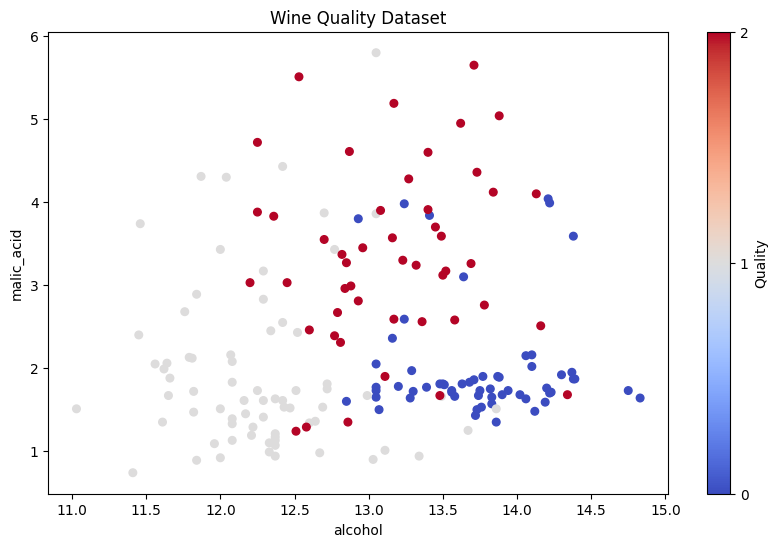

In [4]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(wine_df['alcohol'], wine_df['malic_acid'], c=wine_df['target'], cmap='coolwarm', s=30)

plt.title(f"Wine Quality Dataset")
plt.xlabel('alcohol') 
plt.ylabel('malic_acid')
plt.colorbar(ticks=np.unique(Y), label='Quality')
plt.show()

In [5]:
# Standardize features
scaler = StandardScaler()
X2 = scaler.fit_transform(X)  

In [6]:
# Split the data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

DECISION TREE CLASSIFIER - WINE DATASET

Accuracy: 0.9815

Training Score: 0.9919
Testing Score: 0.9815

Feature Importance:
flavanoids                    : 0.4198
color_intensity               : 0.4166
proline                       : 0.1217
alcohol                       : 0.0331
hue                           : 0.0089
malic_acid                    : 0.0000
ash                           : 0.0000
alcalinity_of_ash             : 0.0000
magnesium                     : 0.0000
total_phenols                 : 0.0000
nonflavanoid_phenols          : 0.0000
proanthocyanins               : 0.0000
od280/od315_of_diluted_wines  : 0.0000


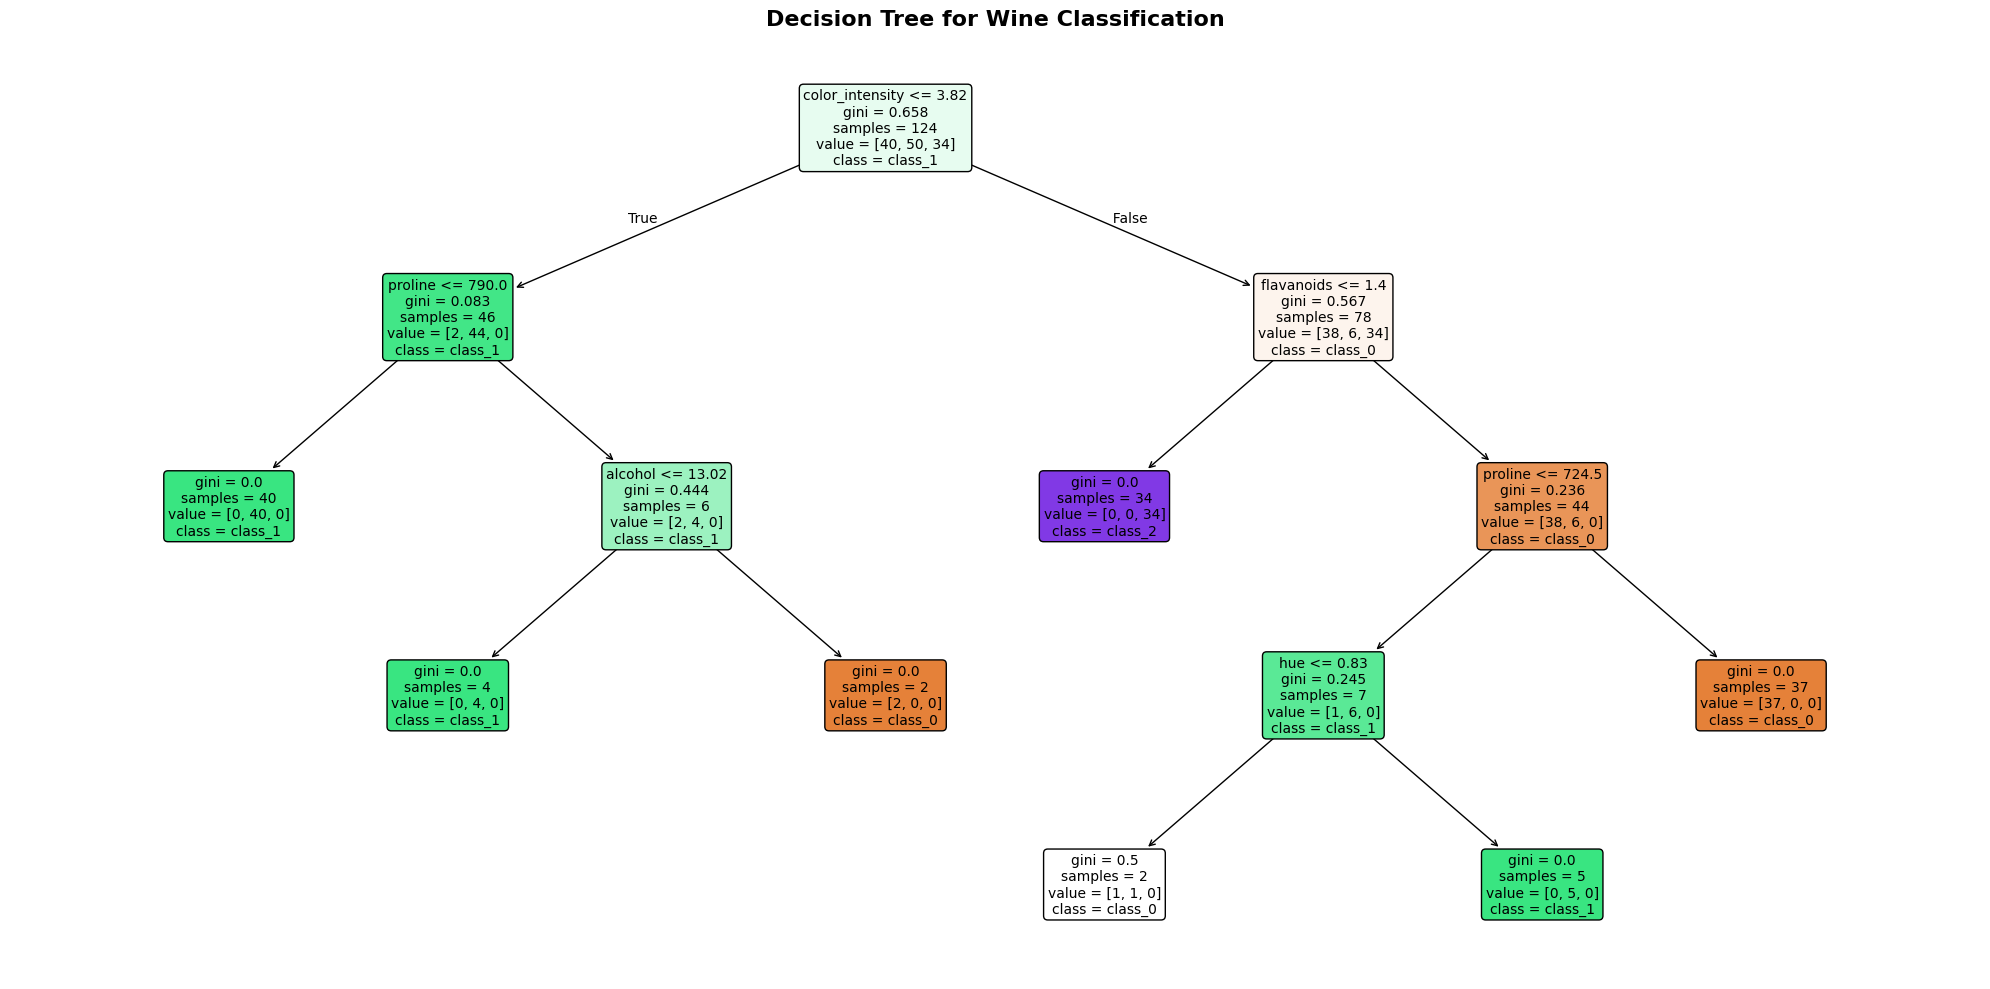


Decision tree visualization saved as 'wine_decision_tree.png'


In [39]:
# Create and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(
    max_depth=4,  # Limit depth to prevent overfitting
    random_state=42,
    min_samples_split=5,
    min_samples_leaf=2
)

dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print("=" * 60)
print("DECISION TREE CLASSIFIER - WINE DATASET")
print("=" * 60)
print(f"\nAccuracy: {accuracy_score(Y_test, y_pred):.4f}")
print(f"\nTraining Score: {dt_classifier.score(X_train, Y_train):.4f}")
print(f"Testing Score: {dt_classifier.score(X_test, Y_test):.4f}")

# Feature importance
print("\nFeature Importance:")
feature_importance = sorted(
    zip(wine.feature_names, dt_classifier.feature_importances_),
    key=lambda x: x[1],
    reverse=True
)
for feature, importance in feature_importance:
    print(f"{feature:30s}: {importance:.4f}")

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree( dt_classifier, feature_names=wine.feature_names, class_names=wine.target_names, filled=True, rounded=True, fontsize=10)

plt.title("Decision Tree for Wine Classification", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('wine_decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "=" * 60)
print("Decision tree visualization saved as 'wine_decision_tree.png'")
print("=" * 60)